In [14]:
import sys
from pathlib import Path

project_root = Path.cwd().parent
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from src.preprocessing import preprocess_data

In [16]:
df = pd.read_csv('../data/raw/retail_customers_COMPLETE_CATEGORICAL.csv')

In [17]:
df.columns

Index(['CustomerID', 'Recency', 'Frequency', 'MonetaryTotal', 'MonetaryAvg',
       'MonetaryStd', 'MonetaryMin', 'MonetaryMax', 'TotalQuantity',
       'AvgQuantityPerTransaction', 'MinQuantity', 'MaxQuantity',
       'CustomerTenureDays', 'FirstPurchaseDaysAgo', 'PreferredDayOfWeek',
       'PreferredHour', 'PreferredMonth', 'WeekendPurchaseRatio',
       'AvgDaysBetweenPurchases', 'UniqueProducts', 'UniqueDescriptions',
       'AvgProductsPerTransaction', 'UniqueCountries', 'NegativeQuantityCount',
       'ZeroPriceCount', 'CancelledTransactions', 'ReturnRatio',
       'TotalTransactions', 'UniqueInvoices', 'AvgLinesPerInvoice', 'Age',
       'RegistrationDate', 'NewsletterSubscribed', 'LastLoginIP',
       'SupportTicketsCount', 'SatisfactionScore', 'RFMSegment', 'AgeCategory',
       'SpendingCategory', 'CustomerType', 'FavoriteSeason',
       'PreferredTimeOfDay', 'Region', 'LoyaltyLevel', 'ChurnRiskCategory',
       'WeekendPreference', 'BasketSizeCategory', 'ProductDiversity', 

In [18]:
for col in df.select_dtypes(include=['object', 'category']).columns:
    print(f"{col}: {df[col].unique()}")

RegistrationDate: ['17/07/10' '2010-10-04' '12/09/2009' ... '12/30/2011' '2011-12-06'
 '22/12/11']
NewsletterSubscribed: ['Yes']
LastLoginIP: ['59.252.219.201' '77.255.247.14' '51.139.78.80' ... '22.250.38.14'
 '226.235.111.122' '154.168.54.141']
RFMSegment: ['Fidèles' 'Champions' 'Potentiels' 'Dormants']
AgeCategory: ['Inconnu' '45-54' '25-34' '65+' '35-44' '18-24' '55-64']
SpendingCategory: ['VIP' 'High' 'Medium' 'Low']
CustomerType: ['Perdu' 'Régulier' 'Hyperactif' 'Nouveau' 'Occasionnel']
FavoriteSeason: ['Hiver' 'Automne' 'Été' 'Printemps']
PreferredTimeOfDay: ['Matin' 'Midi' 'Après-midi' 'Soir']
Region: ['UK' 'Europe continentale' 'Océanie' 'Europe du Nord' 'Autre'
 'Europe centrale' 'Europe du Sud' "Europe de l'Est" 'Asie' 'Moyen-Orient'
 'Amérique du Nord' 'Amérique du Sud' 'Afrique']
LoyaltyLevel: ['Jeune' 'Établi' 'Ancien' 'Nouveau']
ChurnRiskCategory: ['Critique' 'Moyen' 'Faible' 'Élevé']
WeekendPreference: ['Inconnu' 'Semaine' 'Weekend']
BasketSizeCategory: ['Moyen' 'Grand'

In [19]:
df = preprocess_data(df)

In [20]:
df.columns

Index(['Recency', 'Frequency', 'TotalQuantity', 'CustomerTenureDays',
       'FirstPurchaseDaysAgo', 'PreferredMonth', 'AvgDaysBetweenPurchases',
       'UniqueDescriptions', 'NegativeQuantityCount', 'ZeroPriceCount',
       'ReturnRatio', 'AvgLinesPerInvoice', 'RFMSegment', 'SpendingCategory',
       'ChurnRiskCategory', 'BasketSizeCategory', 'Country', 'Churn',
       'CustomerType_Nouveau', 'CustomerType_Occasionnel',
       'CustomerType_Régulier', 'FavoriteSeason_Hiver',
       'FavoriteSeason_Printemps', 'FavoriteSeason_Été',
       'Region_Amérique du Nord', 'Region_Amérique du Sud', 'Region_Autre',
       'Region_Europe centrale', 'Region_Europe continentale',
       'Region_Europe de l'Est', 'Region_Europe du Nord',
       'Region_Moyen-Orient', 'WeekendPreference_Semaine',
       'ProductDiversity_Modéré', 'ProductDiversity_Spécialisé',
       'AccountStatus_Suspended', 'GeoIP', 'RegistrationMonth',
       'RegistrationDayOfWeek', 'DaysSinceRegistration'],
      dtype='object

In [21]:
for col in df.select_dtypes(include=['object', 'category']).columns:
    print(f"{col}: {df[col].unique()}")

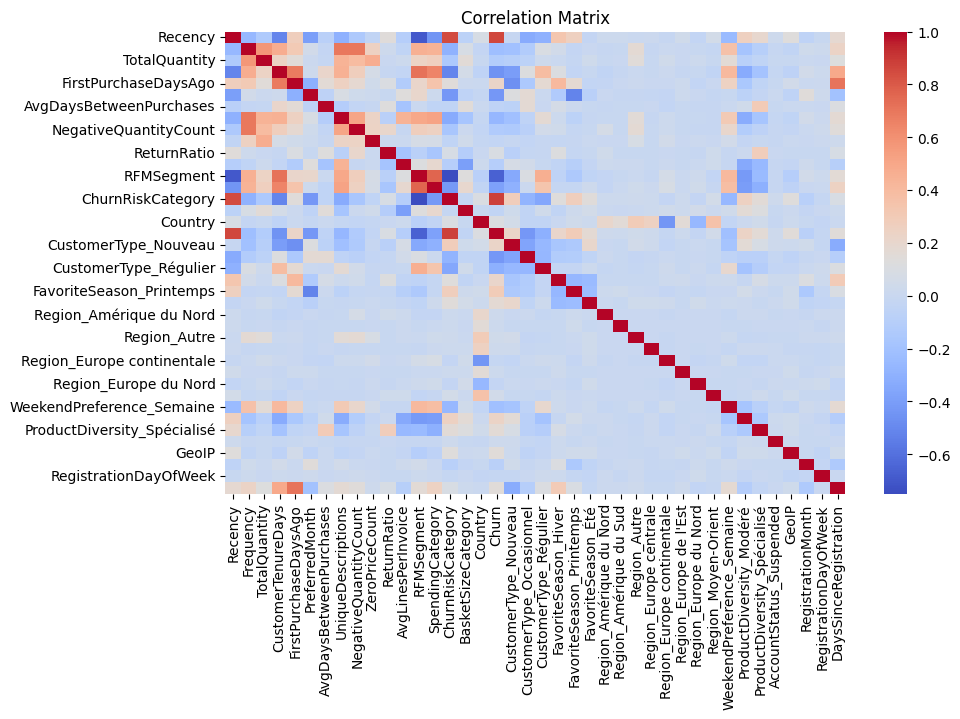

In [22]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [23]:
threshold = 0.9
corr_matrix = df.corr().abs()

high_corr = np.where(corr_matrix > threshold)
high_corr = [
    (corr_matrix.index[i], corr_matrix.columns[j], corr_matrix.iloc[i, j])
    for i, j in zip(*high_corr)
    if i != j and i < j
]

churn_corr = df.corr()["Churn"].abs()
high_corr_with_churn = []
for feat1, feat2, corr_value in high_corr:
    high_corr_with_churn.append(
        (
            feat1,
            feat2,
            corr_value,
            churn_corr[feat1] > churn_corr[feat2] and feat1 or feat2,
        )
    )

high_corr_with_churn

[]

In [24]:
df.columns

Index(['Recency', 'Frequency', 'TotalQuantity', 'CustomerTenureDays',
       'FirstPurchaseDaysAgo', 'PreferredMonth', 'AvgDaysBetweenPurchases',
       'UniqueDescriptions', 'NegativeQuantityCount', 'ZeroPriceCount',
       'ReturnRatio', 'AvgLinesPerInvoice', 'RFMSegment', 'SpendingCategory',
       'ChurnRiskCategory', 'BasketSizeCategory', 'Country', 'Churn',
       'CustomerType_Nouveau', 'CustomerType_Occasionnel',
       'CustomerType_Régulier', 'FavoriteSeason_Hiver',
       'FavoriteSeason_Printemps', 'FavoriteSeason_Été',
       'Region_Amérique du Nord', 'Region_Amérique du Sud', 'Region_Autre',
       'Region_Europe centrale', 'Region_Europe continentale',
       'Region_Europe de l'Est', 'Region_Europe du Nord',
       'Region_Moyen-Orient', 'WeekendPreference_Semaine',
       'ProductDiversity_Modéré', 'ProductDiversity_Spécialisé',
       'AccountStatus_Suspended', 'GeoIP', 'RegistrationMonth',
       'RegistrationDayOfWeek', 'DaysSinceRegistration'],
      dtype='object

Text(0.5, 1.0, 'Feature Correlation with Churn')

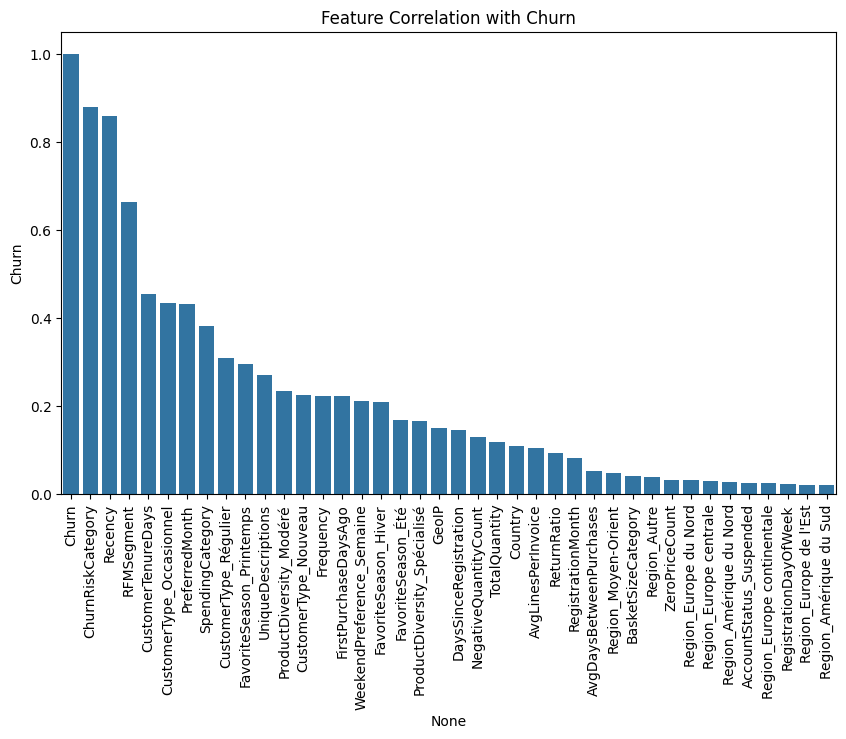

In [25]:
# plot histogram of every feature's correlation with churn
feature_corr_with_churn = df.corr()["Churn"].abs().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_corr_with_churn.index, y=feature_corr_with_churn
.sort_values(ascending=False))
plt.xticks(rotation=90)
plt.title("Feature Correlation with Churn")

In [26]:
# List features with less than 0.1 correlation with churn
min_corr = 0.05

low_corr_features = feature_corr_with_churn[feature_corr_with_churn < min_corr].index.tolist()
print(f"Features with less than {min_corr} correlation with churn:")
low_corr_features

Features with less than 0.05 correlation with churn:


['Region_Moyen-Orient',
 'BasketSizeCategory',
 'Region_Autre',
 'ZeroPriceCount',
 'Region_Europe du Nord',
 'Region_Europe centrale',
 'Region_Amérique du Nord',
 'AccountStatus_Suspended',
 'Region_Europe continentale',
 'RegistrationDayOfWeek',
 "Region_Europe de l'Est",
 'Region_Amérique du Sud']